# Installations

In [1]:
! pip install -q torchview
! pip install -q -U graphviz
! pip install torchviz
! pip install ptflops

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=8caaf90444a2c8c55e3db12853450c2e9907fbe5eaf7dde1534c3758cce60b3b
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz
  Preparing metadata (setup.py) ... done
  Created wheel for ptflops: filename=ptflops-0.7.2.1-py3-none-any.whl size=14624 sha256=5ef29e85bd0e9f97e160b6daaaf21949fa0bb44a0a3a85c40a290571f4673f9b
  Stored in directory: /root/.cache/pip/wheels/11/5b/6e/1b92ceb35b439570ee290b95b0054dfe025e55d5dae77c9212
Successfully built ptflops


### Imports

In [2]:
import time
import torch
import graphviz
graphviz.set_jupyter_format('png')
import numpy as np
print("Version of pytorch == ",torch.__version__)
# set the seed for reproducibility
torch.manual_seed(42)
import torch.nn as nn
import torch.nn.functional as F
from ptflops import get_model_complexity_info
from torchviz import make_dot, make_dot_from_trace
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()
from torchsummary import summary
from torchview import draw_graph
## Progress bar
from tqdm.notebook import tqdm

Version of pytorch ==  2.1.0+cu121


<ipython-input-2-412944e8bcf2>:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [3]:
def plot(xs, ys, xlim=(-3, 3), ylim=(-3, 3)):
  fig, ax = plt.subplots()
  ax.plot(xs, ys, linewidth=5)
  # ax.set_aspect('equal')
  ax.grid(True, which='both')

  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)

# Review: Numpy

Numpy arrays are objects that allow you to store and manipulate matrices.

In [5]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([[8, 0, 7], [3, 0, 1]])
z = np.random.rand(3, 2, 3)
print(f"x, shape={x.shape}:\n{x}\n")
print(f"y, shape={y.shape}:\n{y}\n")
print(f"z, shape={z.shape}:\n{z}\n")

x, shape=(6,):
[1 2 3 4 5 6]

y, shape=(2, 3):
[[8 0 7]
 [3 0 1]]

z, shape=(3, 2, 3):
[[[0.41797238 0.37215668 0.27732035]
  [0.03796423 0.20832171 0.92976416]]

 [[0.09876544 0.84374018 0.42000812]
  [0.91851243 0.27430545 0.18225925]]

 [[0.25232105 0.07349769 0.09617289]
  [0.28285442 0.27605792 0.22357903]]]



You can index into Numpy arrays similar to Python lists (with integers or slices), with the addition of being able to specify indices for multiple dimensions.

In [ ]:
x = np.arange(1, 21, 1).reshape(4, 5)
print(x)
print()
print(x[2]) # Single index
print(x[2, 3]) # Indices for multiple dimensions
print(x[2:4, 3]) # Combining integer index and slice

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]

[11 12 13 14 15]
14
[14 19]


## Numpy arithmetic and broadcasting

You can add/subtract/multiple/divide numpy arrays, as long as their dimensions match:

In [ ]:
a = np.ones((2, 3))
print(a)
print("+")
print(y)
print("=")
print(a + y)

[[1. 1. 1.]
 [1. 1. 1.]]
+
[[8 0 7]
 [3 0 1]]
=
[[9. 1. 8.]
 [4. 1. 2.]]


#### You can also sometimes do arithmetic operations on arrays whose dimensions _don't_ match exactly. Whenever possible, values will be "copied" so that the dimensions match:

In [ ]:
print(f"3\n*\n{a}\n=\n{3*a}\n")

a = np.array([1, 2, 3])
print(f"{a}\n+\n{z}\n=\n{a+z}")

3
*
[[1. 1. 1.]
 [1. 1. 1.]]
=
[[3. 3. 3.]
 [3. 3. 3.]]

[1 2 3]
+
[[[0.40538846 0.0264669  0.77048094]
  [0.50644153 0.91812284 0.35743789]]

 [[0.47166099 0.05648847 0.39169069]
  [0.49965681 0.73454094 0.66374398]]

 [[0.66915287 0.51880557 0.71776179]
  [0.70476617 0.77095636 0.60141056]]]
=
[[[1.40538846 2.0264669  3.77048094]
  [1.50644153 2.91812284 3.35743789]]

 [[1.47166099 2.05648847 3.39169069]
  [1.49965681 2.73454094 3.66374398]]

 [[1.66915287 2.51880557 3.71776179]
  [1.70476617 2.77095636 3.60141056]]]


This is called [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html), and it has many benefits:
- More concise code
- Duplicated values aren't explicitly created/stored in memory
- Repeated operations are optimized to run faster

In [ ]:
x = np.array([[8, 7, 4], [5, 2, 2], [1, 6, 3]])
print("Sum of all the elements of the array = ",np.sum(x))
print("Sum along axis 0 = ",np.sum(x, axis=0))
print("Sum along axis 1 = ",np.sum(x, axis=1))
# print()
print("Max of all the elements of the array = ",np.max(x))
print("Max along axis 0 = ",np.max(x, axis=0))
print("Max along axis 1 = ",np.max(x, axis=1))

Sum of all the elements of the array =  38
Sum along axis 0 =  [14 15  9]
Sum along axis 1 =  [19  9 10]
Max of all the elements of the array =  8
Max along axis 0 =  [8 7 4]
Max along axis 1 =  [8 5 6]


More generally, you can think of an axis as the index of one of the values in the array's `shape`. If you do a reduction operation (e.g. sum, max) on a certain axis, that axis will disappear from the array's shape:

In [ ]:
z = np.random.randint(10, size=(3, 2, 4, 5))
print(np.sum(z, axis=2).shape)
print(np.sum(z, axis=(0, 2)).shape)

(3, 2, 5)
(2, 5)


### Shapes and reshaping

Be careful about the shape of your numpy arrays, especially when you're working with vectors (where one of the dimensions is 1)!

In [ ]:
# These two are different things!
x = np.random.randint(10, size=(10,))
y = np.random.randint(10, size=(10, 1))
print(x)
print(y)

[3 9 6 2 1 9 8 2 5 5]
[[6]
 [4]
 [0]
 [1]
 [3]
 [5]
 [5]
 [1]
 [5]
 [9]]


In [ ]:
# If you multiply a shape (n,) array with a (n,1) array, you actually get a shape (n,n) matrix:
# Thank god we don't have to write that 3-layer for loop for computing the martix multiplication
print(x)
print("*")
print(y)
print("=")
print(x * y)

[3 9 6 2 1 9 8 2 5 5]
*
[[6]
 [4]
 [0]
 [1]
 [3]
 [5]
 [5]
 [1]
 [5]
 [9]]
=
[[18 54 36 12  6 54 48 12 30 30]
 [12 36 24  8  4 36 32  8 20 20]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 3  9  6  2  1  9  8  2  5  5]
 [ 9 27 18  6  3 27 24  6 15 15]
 [15 45 30 10  5 45 40 10 25 25]
 [15 45 30 10  5 45 40 10 25 25]
 [ 3  9  6  2  1  9  8  2  5  5]
 [15 45 30 10  5 45 40 10 25 25]
 [27 81 54 18  9 81 72 18 45 45]]


In [ ]:
# If your intention is to multiply the two vectors element-wise, you need to reshape one of them first!
x_reshaped = x.reshape(-1, 1) # -1 means "infer this dimension"
print()
print(x_reshaped)
print("*")
print(y)
print("=")
print(x_reshaped * y)


[[3]
 [9]
 [6]
 [2]
 [1]
 [9]
 [8]
 [2]
 [5]
 [5]]
*
[[6]
 [4]
 [0]
 [1]
 [3]
 [5]
 [5]
 [1]
 [5]
 [9]]
=
[[18]
 [36]
 [ 0]
 [ 2]
 [ 3]
 [45]
 [40]
 [ 2]
 [25]
 [45]]


In [ ]:
# Removing axis/axes from an array - not inplace operations
print(y.shape)
print(y.reshape(10).shape)
print(y.squeeze().shape)
print(y.shape)

(10, 1)
(10,)
(10,)
(10, 1)


In [ ]:
# Adding axis/axes to an array
print(x.shape)
# print(x.reshape(-1, 1).shape)
print(x[:, np.newaxis].shape)
print(x[:, None].shape) # Same as above, but not as readable

(10,)
(10, 1)
(10, 1)


In [ ]:
a = np.random.randint(10, size=(10, 1, 4, 1, 1, 6, 2))
print(a.shape)
# reshape the array to this shape
print(a.reshape(10, 4, 1, 6, 2).shape)
# squeeze the shape of the 1st and the 3rd index of the numpy array
print(a.squeeze((1, 3)).shape)

(10, 1, 4, 1, 1, 6, 2)
(10, 4, 1, 6, 2)
(10, 4, 1, 6, 2)


In [ ]:
# Add some axis in the numpy array
b = np.random.randint(10, size=(10, 4, 2, 7, 8, 9))
print(b.shape)
print(b.reshape(10, 1, 4, 1, 2, 7, 8, 9).shape)
print(b[:, np.newaxis, :, np.newaxis, ...].shape) # ... means "rest of dimensions"

(10, 4, 2, 7, 8, 9)
(10, 1, 4, 1, 2, 7, 8, 9)
(10, 1, 4, 1, 2, 7, 8, 9)


## Array Multiplication

Numpy has two multiplication operators: `*` and `@`.
- `*` does **element-wise** multiplication.
- `@` does **matrix** multiplication.

In [ ]:
matrix = np.random.randint(10, size=(5, 5))
print("Matrix == ",matrix," shape = ",matrix.shape)
row_vec = np.random.randint(10, size=(5,))
print("row_vec == ",row_vec," shape = ",row_vec.shape)
col_vec = row_vec.reshape(5, 1)
print("col_vec == ",col_vec," shape = ",col_vec.shape)
print("--"*20)
# Outer product
print(col_vec)
print("*")
print(row_vec)
print("=")
print(col_vec * row_vec)

Matrix ==  [[8 4 7 7 8]
 [2 4 8 5 9]
 [1 1 6 2 6]
 [2 9 5 7 1]
 [0 9 4 5 9]]  shape =  (5, 5)
row_vec ==  [4 9 8 4 2]  shape =  (5,)
col_vec ==  [[4]
 [9]
 [8]
 [4]
 [2]]  shape =  (5, 1)
----------------------------------------
[[4]
 [9]
 [8]
 [4]
 [2]]
*
[4 9 8 4 2]
=
[[16 36 32 16  8]
 [36 81 72 36 18]
 [32 72 64 32 16]
 [16 36 32 16  8]
 [ 8 18 16  8  4]]


In [ ]:
# Dot product
print(row_vec)
print("@")
print(col_vec)
print("=")
print("\n row_vec @ col_vec :: ",(row_vec @ col_vec)) # Result will be a shape (1,) array
print("\n row_vec.dot(col_vec).squeeze() :: ",row_vec.dot(col_vec).squeeze()) # Same as above
print("\n row_vec @ col_vec.squeeze() :: ",row_vec @ col_vec.squeeze()) # Works on arrays with same shape too (to get scalar)

[4 9 8 4 2]
@
[[4]
 [9]
 [8]
 [4]
 [2]]
=

 row_vec @ col_vec ::  [181]

 row_vec.dot(col_vec).squeeze() ::  181

 row_vec @ col_vec.squeeze() ::  181


Below are some other common Numpy operations you'll probably find useful at some point in this class:

In [ ]:
# transpose: reorders the axes of the array
z = np.random.rand(28, 28, 3)
z_transposed = z.transpose((2, 0, 1))
print("Orig shape:", z.shape)
print("New shape: ", z_transposed.shape)


Orig shape: (28, 28, 3)
New shape:  (3, 28, 28)


# Basics of Pytorch

## What is PyTorch?

[PyTorch](https://pytorch.org/) is an open source machine learning and deep learning framework.

## What can PyTorch be used for?

PyTorch allows you to manipulate and process data and write machine learning algorithms using Python code.

## Who uses PyTorch?

Many of the worlds largest technology companies such as [Meta (Facebook)](https://ai.facebook.com/blog/pytorch-builds-the-future-of-ai-and-machine-learning-at-facebook/), Tesla and Microsoft as well as artificial intelligence research companies such as [OpenAI use PyTorch](https://openai.com/blog/openai-pytorch/) to power research and bring machine learning to their products.

![pytorch being used across industry and research](https://jimut123.github.io/courses/vision/assets/Lecture_2/images/00-pytorch-being-used-across-research-and-industry.png)

For example, Andrej Karpathy (head of AI at Tesla) has given several talks ([PyTorch DevCon 2019](https://youtu.be/oBklltKXtDE), [Tesla AI Day 2021](https://youtu.be/j0z4FweCy4M?t=2904)) about how Tesla use PyTorch to power their self-driving computer vision models.

PyTorch is also used in other industries such as argiculture to [power computer vision on tractors](https://medium.com/pytorch/ai-for-ag-production-machine-learning-for-agriculture-e8cfdb9849a1).

## Why use PyTorch?

Machine learning researchers love using PyTorch. And as of February 2022, PyTorch is the [most used deep learning framework on Papers With Code](https://paperswithcode.com/trends), a website for tracking machine learning research papers and the code repositories attached with them.

PyTorch also helps take care of many things such as GPU acceleration (making your code run faster) behind the scenes.

So you can focus on manipulating data and writing algorithms and PyTorch will make sure it runs fast.

And if companies such as Tesla and Meta (Facebook) use it to build models they deploy to power hundreds of applications, drive thousands of cars and deliver content to billions of people, it's clearly capable on the development front too.

#### Similarity to Numpy

## Introduction to tensors

Now we've got PyTorch imported, it's time to learn about tensors.

Tensors are the fundamental building block of machine learning.

Their job is to represent data in a numerical way.

For example, you could represent an image as a tensor with shape `[3, 224, 224]` which would mean `[colour_channels, height, width]`, as in the image has `3` colour channels (red, green, blue), a height of `224` pixels and a width of `224` pixels.

![example of going from an input image to a tensor representation of the image, image gets broken down into 3 colour channels as well as numbers to represent the height and width](https://jimut123.github.io/courses/vision/assets/Lecture_2/images/00-tensor-shape-example-of-image.png)

In tensor-speak (the language used to describe tensors), the tensor would have three dimensions, one for `colour_channels`, `height` and `width`.

But we're getting ahead of ourselves.

Let's learn more about tensors by coding them.


PyTorch is built around _tensors_, which are very similar to numpy arrays. You can do many of the same operations in PyTorch; everything we covered above applies to PyTorch tensors as well!

In [ ]:
x = torch.zeros(2, 3)
y = torch.ones(2, 3)
z = x + y

print(x)
print("+")
print(y)
print("=")
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
+
tensor([[1., 1., 1.],
        [1., 1., 1.]])
=
tensor([[1., 1., 1.],
        [1., 1., 1.]])


Reduction operations work the same way as they do in Numpy, except we use the argument `dim` instead of `axis`:

In [ ]:
print(torch.sum(z, dim=1))
print(torch.sum(z, dim=0))

tensor([3., 3.])
tensor([2., 2., 2.])


Also like Numpy, PyTorch will try to broadcast operations:

In [ ]:
x = torch.ones((3, 1))
y = torch.ones((1, 3))
z = x + y

print(x)
print("+")
print(y)
print("=")
print(z)

tensor([[1.],
        [1.],
        [1.]])
+
tensor([[1., 1., 1.]])
=
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [ ]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

See how the above printed out `tensor(7)`?

That means although `scalar` is a single number, it's of type `torch.Tensor`.

We can check the dimensions of a tensor using the `ndim` attribute.

In [ ]:
scalar.ndim

0

What if we wanted to retrieve the number from the tensor?

As in, turn it from `torch.Tensor` to a Python integer?

To do we can use the `item()` method.

In [ ]:
# Get the Python number within a tensor (only works with one-element tensors)
scalar.item()

7

Okay, now let's see a **vector**.

A vector is a single dimension tensor but can contain many numbers.

As in, you could have a vector `[3, 2]` to describe `[bedrooms, bathrooms]` in your house. Or you could have `[3, 2, 2]` to describe `[bedrooms, bathrooms, car_parks]` in your house.

The important trend here is that a vector is flexible in what it can represent (the same with tensors).

In [ ]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

Wonderful, `vector` now contains two 7's, my favourite number.

How many dimensions do you think it'll have?

In [ ]:
# Check the number of dimensions of vector
vector.ndim

1

Hmm, that's strange, `vector` contains two numbers but only has a single dimension.

I'll let you in on a trick.

You can tell the number of dimensions a tensor in PyTorch has by the number of square brackets on the outside (`[`) and you only need to count one side.

How many square brackets does `vector` have?

Another important concept for tensors is their `shape` attribute. The shape tells you how the elements inside them are arranged.

Let's check out the shape of `vector`.

In [ ]:
# Check shape of vector
vector.shape

torch.Size([2])

The above returns `torch.Size([2])` which means our vector has a shape of `[2]`. This is because of the two elements we placed inside the square brackets (`[7, 7]`).

Let's now see a **matrix**.

In [ ]:
# Matrix
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

Wow! More numbers! Matrices are as flexible as vectors, except they've got an extra dimension.


In [ ]:
# Check number of dimensions
MATRIX.ndim

2

`MATRIX` has two dimensions (did you count the number of square brakcets on the outside of one side?).

What `shape` do you think it will have?

In [ ]:
MATRIX.shape

torch.Size([2, 2])

We get the output `torch.Size([2, 2])` because `MATRIX` is two elements deep and two elements wide.

How about we create a **tensor**?

In [ ]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

Woah! What a nice looking tensor.

I want to stress that tensors can represent almost anything.

The one we just created could be the sales numbers for a steak and almond butter store (two of my favourite foods).


How many dimensions do you think it has? (hint: use the square bracket counting trick)

In [ ]:
# Check number of dimensions for TENSOR
TENSOR.ndim

3

In [ ]:
# Check shape of TENSOR
TENSOR.shape

torch.Size([1, 3, 3])

Alright, it outputs `torch.Size([1, 3, 3])`.

The dimensions go outer to inner.

That means there's 1 dimension of 3 by 3.

![example of different tensor dimensions](https://jimut123.github.io/courses/vision/assets/Lecture_2/images/00-pytorch-different-tensor-dimensions.png)

> **Note:** You might've noticed me using lowercase letters for `scalar` and `vector` and uppercase letters for `MATRIX` and `TENSOR`. This was on purpose. In practice, you'll often see scalars and vectors denoted as lowercase letters such as `y` or `a`. And matrices and tensors denoted as uppercase letters such as `X` or `W`.
>
> You also might notice the names matrix and tensor used interchangably. This is common. Since in PyTorch you're often dealing with `torch.Tensor`'s (hence the tensor name), however, the shape and dimensions of what's inside will dictate what it actually is.

Let's summarise.

| Name | What is it? | Number of dimensions | Lower or upper (usually/example) |
| ----- | ----- | ----- | ----- |
| **scalar** | a single number | 0 | Lower (`a`) |
| **vector** | a number with direction (e.g. wind speed with direction) but can also have many other numbers | 1 | Lower (`y`) |
| **matrix** | a 2-dimensional array of numbers | 2 | Upper (`Q`) |
| **tensor** | an n-dimensional array of numbers | can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector | Upper (`X`) |

![scalar vector matrix tensor and what they look like](https://jimut123.github.io/courses/vision/assets/Lecture_2/images/00-scalar-vector-matrix-tensor.png)

## Some basic operations using tensors

#### Vector is a 1-D tensor, Matrix is a 2D tensor. Similar to numpy arrays.
##### several types of tensor creation strategies:

```torch.zeros``` : Filled with zeros

```torch.ones```: Filled with ones

```torch.rand```: Tensor with random values uniformly sampled between 0 and 1

```torch.randn```: Tensor with random values sampled from a normal distribution with mean 0 and variance 1.

```torch.arange```: Tensor containing the values N, N+1, N+2, ...M

```torch.Tensor```: Creates tensor from the elements you provide as input

In [ ]:
x = torch.rand(2,3,4,5)
print(x)

tensor([[[[0.8823, 0.9150, 0.3829, 0.9593, 0.3904],
          [0.6009, 0.2566, 0.7936, 0.9408, 0.1332],
          [0.9346, 0.5936, 0.8694, 0.5677, 0.7411],
          [0.4294, 0.8854, 0.5739, 0.2666, 0.6274]],

         [[0.2696, 0.4414, 0.2969, 0.8317, 0.1053],
          [0.2695, 0.3588, 0.1994, 0.5472, 0.0062],
          [0.9516, 0.0753, 0.8860, 0.5832, 0.3376],
          [0.8090, 0.5779, 0.9040, 0.5547, 0.3423]],

         [[0.6343, 0.3644, 0.7104, 0.9464, 0.7890],
          [0.2814, 0.7886, 0.5895, 0.7539, 0.1952],
          [0.0050, 0.3068, 0.1165, 0.9103, 0.6440],
          [0.7071, 0.6581, 0.4913, 0.8913, 0.1447]]],


        [[[0.5315, 0.1587, 0.6542, 0.3278, 0.6532],
          [0.3958, 0.9147, 0.2036, 0.2018, 0.2018],
          [0.9497, 0.6666, 0.9811, 0.0874, 0.0041],
          [0.1088, 0.1637, 0.7025, 0.6790, 0.9155]],

         [[0.2418, 0.1591, 0.7653, 0.2979, 0.8035],
          [0.3813, 0.7860, 0.1115, 0.2477, 0.6524],
          [0.6057, 0.3725, 0.7980, 0.8399, 0.1374],
  

In [ ]:
# shape and size are the same thing, which obtains the shape of the tensor
print("Shape of X == ",x.shape)
print("Size of X ==",x.size)

Shape of X ==  torch.Size([2, 3, 4, 5])
Size of X == <built-in method size of Tensor object at 0x7cfb14aef330>


#### Tensor to Numpy and Numpy to Tensor

In [ ]:
np_arr = np.array([[1,2],[3,4]])
tensor = torch.from_numpy(np_arr)
print("Numpy array == ",np_arr)
print("Tensor == ",tensor)

Numpy array ==  [[1 2]
 [3 4]]
Tensor ==  tensor([[1, 2],
        [3, 4]])


The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU (more on GPU support in a later section). In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand. Hence, you get a line like `np_arr = tensor.cpu().numpy()`.

In [ ]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


### Basic operations in tensors

#### ADD two tensors: Creating a new variable

In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.5014, 0.3139, 0.4654],
        [0.1612, 0.1568, 0.2083]])
X2 tensor([[0.3289, 0.1054, 0.9192],
        [0.4008, 0.9302, 0.6558]])
Y tensor([[0.8302, 0.4193, 1.3846],
        [0.5620, 1.0870, 0.8641]])


#### ADD two tensors: Inplace, without creating a new variable

In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.0766, 0.8460, 0.3624],
        [0.3083, 0.0850, 0.0029]])
X2 (before) tensor([[0.6431, 0.3908, 0.6947],
        [0.0897, 0.8712, 0.1330]])
X1 (after) tensor([[0.0766, 0.8460, 0.3624],
        [0.3083, 0.0850, 0.0029]])
X2 (after) tensor([[0.7197, 1.2368, 1.0571],
        [0.3980, 0.9562, 0.1359]])


#### Reshaping of tensors

In [ ]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [ ]:
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X", x)

X tensor([[0, 3],
        [1, 4],
        [2, 5]])


Other commonly used operations include matrix multiplications, which are essential for neural networks. Quite often, we have an input vector $\mathbf{x}$, which is transformed using a learned weight matrix $\mathbf{W}$. There are multiple ways and functions to perform matrix multiplication, some of which we list below:

* `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). Can also be written as `a @ b`, similar to numpy.
* `torch.mm`: Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))
* `torch.bmm`: Performs the matrix product with a support batch dimension. If the first tensor $T$ is of shape ($b\times n\times m$), and the second tensor $R$ ($b\times m\times p$), the output $O$ is of shape ($b\times n\times p$), and has been calculated by performing $b$ matrix multiplications of the submatrices of $T$ and $R$: $O_i = T_i @ R_i$
* `torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention. Explanation of the Einstein sum can be found in assignment 1.

Usually, we use `torch.matmul` or `torch.bmm`. We can try a matrix multiplication with `torch.matmul` below.

In [ ]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [ ]:
h = torch.matmul(x, W) # Verify the result by calculating it by hand too!
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


#### Indexing

We often have the situation where we need to select a part of a tensor. Indexing works just like in numpy, so let's try it:

In [ ]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
print(x[:, 1])   # Second column

tensor([1, 5, 9])


In [ ]:
print(x[0])      # First row

tensor([0, 1, 2, 3])


In [ ]:
print(x[:2, -1]) # First two rows, last column

tensor([3, 7])


In [ ]:
print(x[1:3, :]) # Middle two rows

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


### Finding the min, max, mean, sum, etc (aggregation)

Now we've seen a few ways to manipulate tensors, let's run through a few ways to aggregate them (go from more values to less values).

First we'll create a tensor and then find the max, min, mean and sum of it.





In [ ]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


> **Note:** You may find some methods such as `torch.mean()` require tensors to be in `torch.float32` (the most common) or another specific datatype, otherwise the operation will fail.

You can also do the same as above with `torch` methods.

In [ ]:
torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x)

(tensor(90), tensor(0), tensor(45.), tensor(450))

### Positional min/max

You can also find the index of a tensor where the max or minimum occurs with [`torch.argmax()`](https://pytorch.org/docs/stable/generated/torch.argmax.html) and [`torch.argmin()`](https://pytorch.org/docs/stable/generated/torch.argmin.html) respectively.

This is helpful incase you just want the position where the highest (or lowest) value is and not the actual value itself (we'll see this in a later section when using the [softmax activation function](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)).

In [ ]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


### Change tensor datatype

As mentioned, a common issue with deep learning operations is having your tensors in different datatypes.

If one tensor is in `torch.float64` and another is in `torch.float32`, you might run into some errors.

But there's a fix.

You can change the datatypes of tensors using [`torch.Tensor.type(dtype=None)`](https://pytorch.org/docs/stable/generated/torch.Tensor.type.html) where the `dtype` parameter is the datatype you'd like to use.

First we'll create a tensor and check it's datatype (the default is `torch.float32`).

In [ ]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

Now we'll create another tensor the same as before but change its datatype to `torch.float16`.



In [ ]:
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

And we can do something similar to make a `torch.int8` tensor.

In [ ]:
# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

> **Note:** Different datatypes can be confusing to begin with. But think of it like this, the lower the number (e.g. 32, 16, 8), the less precise a computer stores the value. And with a lower amount of storage, this generally results in faster computation and a smaller overall model. Mobile-based neural networks often operate with 8-bit integers, smaller and faster to run but less accurate than their float32 counterparts. For more on this, I'd read up about [precision in computing](https://en.wikipedia.org/wiki/Precision_(computer_science)).

> **Exercise:** So far we've covered a fair few tensor methods but there's a bunch more in the [`torch.Tensor` documentation](https://pytorch.org/docs/stable/tensors.html), I'd recommend spending 10-minutes scrolling through and looking into any that catch your eye. Click on them and then write them out in code yourself to see what happens.

### Reshaping, stacking, squeezing and unsqueezing

Often times you'll want to reshape or change the dimensions of your tensors without actually changing the values inside them.

To do so, some popular methods are:

| Method | One-line description |
| ----- | ----- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Reshapes `input` to `shape` (if compatible), can also use `torch.Tensor.reshape()`. |
| [`torch.Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) | Returns a view of the original tensor in a different `shape` but shares the same data as the original tensor. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatenates a sequence of `tensors` along a new dimension (`dim`), all `tensors` must be same size. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Squeezes `input` to remove all the dimenions with value `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html) | Returns `input` with a dimension value of `1` added at `dim`. |
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html) | Returns a *view* of the original `input` with its dimensions permuted (rearranged) to `dims`. |

Why do any of these?

Because deep learning models (neural networks) are all about manipulating tensors in some way. And because of the rules of matrix multiplication, if you've got shape mismatches, you'll run into errors. These methods help you make the right elements of your tensors are mixing with the right elements of other tensors.

Let's try them out.

First, we'll create a tensor.

In [ ]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


## Autograd

Autograd is a pytorch module that computes gradients (derivatives) automatically. It constructs Directed Acyclic Graph (DAG) to record operations in tensors, then apply backpropagation to calculate partial derivatives.

### Dynamic Computation Graph and Backpropagation

One of the main reasons for using PyTorch in Deep Learning projects is that we can automatically get **gradients/derivatives** of functions that we define. We will mainly use PyTorch for implementing neural networks, and they are just fancy functions. If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our neural network would output a single scalar value, we would talk about taking the **derivative**, but you will see that quite often we will have **multiple** output variables ("values"); in that case we talk about **gradients**. It's a more general term.

Given an input $\mathbf{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input.
PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

So, to recap: the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**.

> **Note:  Why do we want gradients?** Consider that we have defined a function, a neural net, that is supposed to compute a certain output $y$ for an input vector $\mathbf{x}$. We then define an **error measure** that tells us how wrong our network is; how bad it is in predicting output $y$ from input $\mathbf{x}$. Based on this error measure, we can use the gradients to **update** the weights $\mathbf{W}$ that were responsible for the output, so that the next time we present input $\mathbf{x}$ to our network, the output will be closer to what we want.

The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.

In [ ]:
x = torch.ones((3,))
print(x.requires_grad)

False


In [ ]:
x.requires_grad_(True)
print(x.requires_grad)

True


#### Example 1: When tensors has a single value


In [ ]:
# Initializing tensors with gradient calculation
x = torch.tensor(3.0, requires_grad=True)
print(x)

tensor(3., requires_grad=True)


In [ ]:
y = 3 * (x**2) + 15
print(y)

tensor(42., grad_fn=<AddBackward0>)


In [ ]:
# compute gradients with back-prop
y.backward()

### Dervative of the equation at x = 3
### $y= 3x^2 + 15$
#### ${\frac{\partial y}{\partial x}} = 3 * 2 * x = 6x$
### Remember we set 3 as x above
#### ${\frac{\partial y}{\partial x}}|_{x=3} = 6 * 3 = 18$

In [ ]:
x.grad

tensor(18.)

In [ ]:
# Original data tensor
print(x.data)

tensor(3.)


#### Is tensor a leaf in DAG Tree
* Remember autograd computes derivates in a backpropagation graph

In [ ]:
x.is_leaf

True

# What about y?
### y is an intermediate step to calculate gradients of x, *y doen't have any gradients but has a gradient funciton*
#### See **chain rule**

In [ ]:
print(f'data: {y.data}')
print(f'grad: {y.grad}')
print(f'grad function: {y.grad_fn}')
print(f'is_leaf?: {y.is_leaf}')
print(f'requires_grad? {y.requires_grad}')

data: 42.0
grad: None
grad function: <AddBackward0 object at 0x7cfb14b13400>
is_leaf?: False
requires_grad? True


<ipython-input-68-bfb9fa1637e7>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(f'grad: {y.grad}')


#### Example 2: Partial Derivatives

In [ ]:
# Let's set x to 3
x = torch.tensor(3.0, requires_grad=True)
print(x)

tensor(3., requires_grad=True)


In [ ]:
# Let's set y to 2
y = torch.tensor(2.0, requires_grad=True)
print(y)

tensor(2., requires_grad=True)


In [ ]:
z = 5*(x**3)+7*(y**2)
z.backward()

In [ ]:
x.grad

tensor(135.)

In [ ]:
y.grad

tensor(28.)

In [ ]:
z.is_leaf

False

# Another Example
### $y= 6x^2 + 2x + 4$
#### ${\frac{\partial y}{\partial x}} = 12x + 2$
#### ${\frac{\partial y}{\partial x}}|_{x=2} = 12*2 + 2 = 26$

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = 6*(x**2) + 2*x + 4

print(f'Result y: {y}')

y.backward()
print(f'Derivative of the equation at x=2 is: {x.grad}')

Result y: 32.0
Derivative of the equation at x=2 is: 26.0


#### Error!, you are trying to find the gradient of x when already it is freed.

In [ ]:
x = torch.tensor(4.0, requires_grad=True)
y.backward()
print(f'Derivative of the equation at x=2 is: {x.grad}')

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

#### Be careful when coding stuffs, we find a lot of error like this when we have thousands lines of codes!

# Partial Derivative Example
### $y= x_1^3 + x_2^2 + 4x_1x_2 + 5$
#### ${\frac{\partial y}{\partial x_1}} = 3x_1^2 + 4x_2$
#### ${\frac{\partial y}{\partial x_2}} = 2x_2 + 4x_1$

#### ${\frac{\partial y}{\partial x_1}}|_{x_1=3, x_2=4} = 3*3^2 + 4*4 = 43$
#### ${\frac{\partial y}{\partial x_2}}|_{x_1=3, x_2=4} = 2*4 + 4*3 = 20$

In [ ]:
x1 = torch.tensor(3., requires_grad=True)
x2 = torch.tensor(4., requires_grad=True)

y = x1**3 + x2**2 + 4*x1*x2 + 5

print(x1.data)
print(x2.data)
print(y.data)

tensor(3.)
tensor(4.)
tensor(96.)


In [ ]:
y.backward()
print(f'Partial derivative with respect to x1: {x1.grad}')
print(f'Partial derivative with respect to x2: {x2.grad}')

Partial derivative with respect to x1: 43.0
Partial derivative with respect to x2: 20.0


#### IMPORTANT: By default, PyTorch accumulates (sums) gradients
### Multiple calls to backward()

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
y = 3 * (x**2) + 15
y.backward()
x.grad

tensor(18.)

In [ ]:
y = 3 * (x**2) + 15
y.backward()
x.grad

tensor(36.)

In [ ]:
y = 3 * (x**2) + 15
y.backward()
x.grad

tensor(54.)

#### That's why we will see that we do this zero_grad before the start of every epochs

In [ ]:
x.grad.zero_()
y = 3 * (x**2) + 15
y.backward()
x.grad

tensor(18.)

In [ ]:
x.grad.zero_()
y = 3 * (x**2) + 15
y.backward()
x.grad

tensor(18.)

#### Automatic Inclusion/Exclusion from the DAG

In [ ]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)
print(f" Z : {z}")
a = x + y
print(f"Does 'a' require gradients?: {a.requires_grad}")
b = x + z
print(f"Does 'b' require gradients?: {b.requires_grad}")

 Z : tensor([[0.6159, 0.2141, 0.4242, 0.9886, 0.8235],
        [0.5554, 0.7254, 0.0261, 0.6818, 0.8763],
        [0.6799, 0.6484, 0.9866, 0.9625, 0.9333],
        [0.4565, 0.1780, 0.9579, 0.8003, 0.5390],
        [0.5905, 0.0178, 0.8166, 0.1715, 0.6628]], requires_grad=True)
Does 'a' require gradients?: False
Does 'b' require gradients?: True


### Remove a tensor from the backpropagation graph
### Detaching a tensor

In [ ]:
z.detach()

tensor([[0.6159, 0.2141, 0.4242, 0.9886, 0.8235],
        [0.5554, 0.7254, 0.0261, 0.6818, 0.8763],
        [0.6799, 0.6484, 0.9866, 0.9625, 0.9333],
        [0.4565, 0.1780, 0.9579, 0.8003, 0.5390],
        [0.5905, 0.0178, 0.8166, 0.1715, 0.6628]])

### Note that this is a non-destructive operation

In [ ]:
print(f"Does 'b' require gradients?: {b.requires_grad}")
print(f"Does 'z' require gradients?: {z.requires_grad}")

Does 'b' require gradients?: True
Does 'z' require gradients?: True


### Common use: detach and clone a tensor

In [ ]:
tensor_clone = z.detach().clone()
tensor_clone

tensor([[0.6159, 0.2141, 0.4242, 0.9886, 0.8235],
        [0.5554, 0.7254, 0.0261, 0.6818, 0.8763],
        [0.6799, 0.6484, 0.9866, 0.9625, 0.9333],
        [0.4565, 0.1780, 0.9579, 0.8003, 0.5390],
        [0.5905, 0.0178, 0.8166, 0.1715, 0.6628]])

#### Example 4: When tensors has multiple values

In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$y = \frac{1}{\ell(x)}\sum_i \left[(x_i + 2)^2 + 3\right],$$

where we use $\ell(x)$ to denote the number of elements in $x$. In other words, we are taking a mean here over the operation within the sum. You could imagine that $x$ are our parameters, and we want to optimize (either maximize or minimize) the output $y$. For this, we want to obtain the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


Now let's build the computation graph step by step. You can combine multiple operations in a single line, but we will separate them here to get a better understanding of how each operation is added to the computation graph.

In [ ]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)



Using the statements above, we have created a computation graph that looks similar to the figure below:

<center style="width: 100%"><img src="https://jimut123.github.io/courses/vision/assets/Lecture_2/images/pytorch_computation_graph.svg" width="200px"></center>

We calculate $a$ based on the inputs $x$ and the constant $2$, $b$ is $a$ squared, and so on. The visualization is an abstraction of the dependencies between inputs and outputs of the operations we have applied.
Each node of the computation graph has automatically defined a function for calculating the gradients with respect to its inputs, `grad_fn`. You can see this when we printed the output tensor $y$. This is why the computation graph is usually visualized in the reverse direction (arrows point from the result to the inputs). We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [ ]:
y.backward()

`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$:

In [ ]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


We can also verify these gradients by hand. We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

### Autograd Profiling: For Nerds!

In [ ]:
x = torch.randn((1, 1), requires_grad=True)

with torch.autograd.profiler.profile() as prof:
    for _ in range(100):
        y = x ** 2 + x
        y.backward()

In [ ]:
print(prof.key_averages().table(sort_by='self_cpu_time_total'))

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                              aten::pow        50.97%       3.869ms        52.55%       3.989ms      19.945us           200  
                                              aten::mul         9.12%     692.000us        15.19%       1.153ms       5.765us           200  
                                           PowBackward0         5.63%     427.000us        28.85%       2.190ms      21.900us           100  
      autograd::engine::evaluate_function: PowBackward0         5.52%     419.000us        36.23%       2.750ms      27.500us           100  
      

### Backpropagation Visulizations
#### NOTE: You need to install graphviz to your computer!

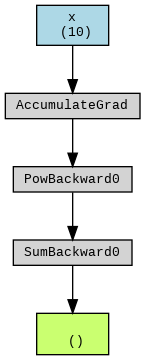

In [ ]:
x = torch.ones(10, requires_grad=True)

y = (x**2).sum()

make_dot(y, params={'x':x}, show_attrs=False, show_saved=False)
#make_dot(r, params={'x':x}, show_attrs=False, show_saved=False).render('backprop_graph', format='png')

In [ ]:
x = torch.ones(10, requires_grad=True)

y = x + 10
z = y ** 2
z = z * 10
y = (z**2).sum()

# Make a render of graph, and save it in PNG format
make_dot(y, params={'x':x}, show_attrs=False, show_saved=False).render('backprop_graph', format='png')


'backprop_graph.png'

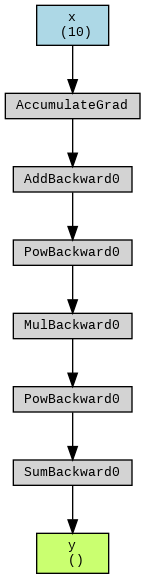

In [ ]:
# Plot graph
make_dot(y, params={'x':x, 'y':y}, show_attrs=False, show_saved=False)

## GPU support

A crucial feature of PyTorch is the support of GPUs, short for Graphics Processing Unit. A GPU can perform many thousands of small operations in parallel, making it very well suitable for performing large matrix operations in neural networks. When comparing GPUs to CPUs, we can list the following main differences (credit: [Kevin Krewell, 2009](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/))

<center style="width: 100%"><img src="https://jimut123.github.io/courses/vision/assets/Lecture_2/images/comparison_CPU_GPU.png" width="700px"></center>

CPUs and GPUs have both different advantages and disadvantages, which is why many computers contain both components and use them for different tasks. In case you are not familiar with GPUs, you can read up more details in this [NVIDIA blog post](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/) or [here](https://www.intel.com/content/www/us/en/products/docs/processors/what-is-a-gpu.html).

GPUs can accelerate the training of your network up to a factor of $100$ which is essential for large neural networks. PyTorch implements a lot of functionality for supporting GPUs (mostly those of NVIDIA due to the libraries [CUDA](https://developer.nvidia.com/cuda-zone) and [cuDNN](https://developer.nvidia.com/cudnn)). First, let's check whether you have a GPU available:

In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


If you have a GPU on your computer but the command above returns False, make sure you have the correct CUDA-version installed. The `dl2023` environment comes with the CUDA 11.8, which is selected for the Snellius supercomputer. Please change it if necessary (CUDA 11.3 is currently common on Colab). On Google Colab, make sure that you have selected a GPU in your runtime setup (in the menu, check under `Runtime -> Change runtime type`).

By default, all tensors you create are stored on the CPU. We can push a tensor to the GPU by using the function `.to(...)`, or `.cuda()`. However, it is often a good practice to define a `device` object in your code which points to the GPU if you have one, and otherwise to the CPU. Then, you can write your code with respect to this device object, and it allows you to run the same code on both a CPU-only system, and one with a GPU. Let's try it below. We can specify the device as follows:

In [ ]:
!nvidia-smi

Fri Jan 19 18:48:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


In [ ]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In case you have a GPU, you should now see the attribute `device='cuda:0'` being printed next to your tensor. The zero next to cuda indicates that this is the zero-th GPU device on your computer. PyTorch also supports multi-GPU systems, but this you will only need once you have very big networks to train (if interested, see the [PyTorch documentation](https://pytorch.org/docs/stable/distributed.html#distributed-basics)). We can also compare the runtime of a large matrix multiplication on the CPU with a operation on the GPU:

In [4]:
x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 7.72567s


NameError: name 'device' is not defined

Depending on the size of the operation and the CPU/GPU in your system, the speedup of this operation can be >50x. As `matmul` operations are very common in neural networks, we can already see the great benefit of training a NN on a GPU. The time estimate can be relatively noisy here because we haven't run it for multiple times. Feel free to extend this, but it also takes longer to run.

When generating random numbers, the seed between CPU and GPU is not synchronized. Hence, we need to set the seed on the GPU separately to ensure a reproducible code. Note that due to different GPU architectures, running the same code on different GPUs does not guarantee the same random numbers. Still, we don't want that our code gives us a different output every time we run it on the exact same hardware. Hence, we also set the seed on the GPU:

If you've never done it before, matrix multiplication can be a confusing topic at first.

But after you've played around with it a few times and even cracked open a few neural networks, you'll notice it's everywhere.

Remember, matrix multiplication is all you need.

![matrix multiplication is all you need](https://jimut123.github.io/courses/vision/assets/Lecture_2/images/00_matrix_multiplication_is_all_you_need.jpeg)

*When you start digging into neural network layers and building your own, you'll find matrix multiplications everywhere. **Source:** https://marksaroufim.substack.com/p/working-class-deep-learner*

#### For reproducibility in CUDA and GPUs: Important

In [ ]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Activation functions and stuffs

## Neural-Network specific functions
PyTorch has a bunch of built-in funcitons.
See [the docs](https://pytorch.org/docs/stable/torch.html) for a full list.

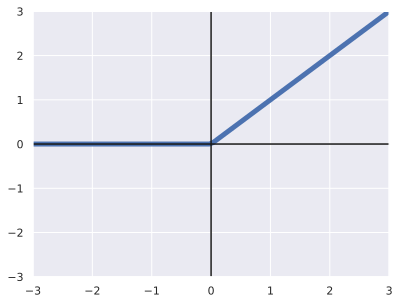

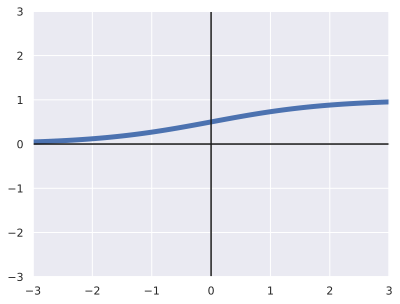

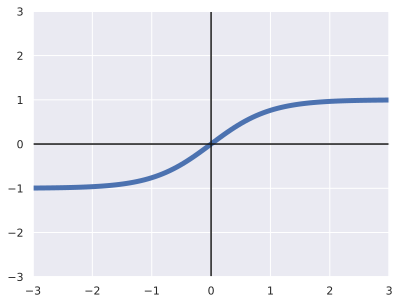

In [6]:
# Activation functions
xs = torch.linspace(-3, 3, 100)
ys = torch.relu(xs)
plot(xs.numpy(), ys.numpy())
ys = torch.sigmoid(xs)
plot(xs.numpy(), ys.numpy())
ys = torch.tanh(xs)
plot(xs.numpy(), ys.numpy())

### Softmax = makes the inputs a probability distribution, and all the values of the input are more than 0 and sum to 1. Here we see that we can sum the values of the inputs across the rows

In [7]:
x = torch.tensor([[2, 3.5],
                  [4, 4]])
torch.softmax(x, dim=-1) # for predicting probabilities, do softmax along last dimension (by row)

tensor([[0.1824, 0.8176],
        [0.5000, 0.5000]])

A few things to watch out for:
- You can't do any in-place operations on a tensor that has `requires_grad=True`. (This prevents you from inadvertently mutating it in a way that isn't tracked for backprop purposes.)

- You also can't convert a tensor with `requires_grad=True` to numpy (for the same reason as above). Instead, you need to detach it first, e.g. `y.detach().numpy()`.

- Even though `y.detach()` returns a new tensor, that tensor occupies the same memory as `y`. Unfortunately, PyTorch lets you make changes to `y.detach()` or `y.detach.numpy()` which will affect `y` as well! If you want to safely mutate the detached version, you should use `y.detach().clone()` instead, which will create a tensor in new memory.

RL Connection: You would want to be doing simulator-related tasks with numpy, convert to torch when doing model-related tasks, and convert back to feed output into simulator.

## Regression task using pytorch

Please try to restart the environment here, use CUDA if possible

In [8]:
# Checking whether GPU is available
print(torch.cuda.is_available())

# Initialize a tensor on GPU instead of CPU
device = torch.device("cuda")

True


torch.Size([100, 1])


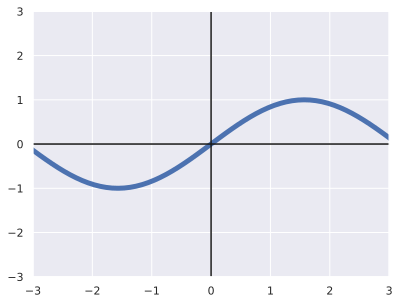

In [9]:
x = torch.linspace(-5, 5, 100).view(100, 1)
print(x.shape)
y_target = torch.sin(x)
loss_fn = nn.MSELoss()
plot(x, y_target)

`nn.Module` represents the building blocks of a computation graph.
For example, in typical pytorch code, each convolution block above is its own module, each fully connected block is a module, and the whole network itself is also a module.
Modules can contain modules within them.
All the classes inside of `torch.nn` are instances `nn.Modules`.
Below is an example definition of a module:

### Drawing and visualizing the network

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.net = nn.Sequential()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

The main function that you need to implement is the `forward` function.
Otherwise, it's a normal Python object:

In [12]:
net = Net(input_size=1, output_size=1)
net = net.to(device)
print(net)

Net(
  (net): Sequential()
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)


#### Torchsummary of the model

In [13]:
summary(net, input_size=(100, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 100, 32]              64
            Linear-2              [-1, 100, 32]           1,056
            Linear-3               [-1, 100, 1]              33
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.00
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


In [14]:
x= x.to(device)
y = net(x)
# net.forward(x) <- DON't DO THIS
print(y.shape)

torch.Size([100, 1])


#### Visualizations of the model

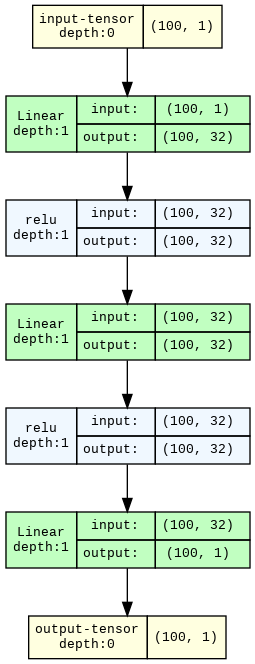

In [15]:
model_graph1 = draw_graph(net, input_size=(100,1),  expand_nested=True)
model_graph1.visual_graph.render(format='png')
model_graph1.visual_graph

Let's visualize what the network looks like before training.

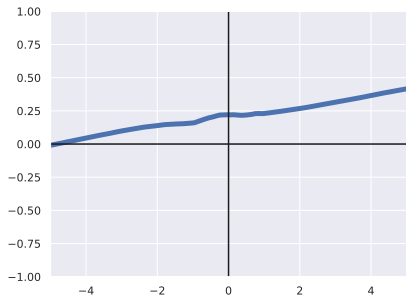

In [16]:
plot(x.detach().cpu().numpy(), y.detach().cpu().numpy(), ylim=(-1, 1), xlim=(-5, 5))

Let's look into what the `nn.Module` is doing...

In the `__init__` function, any variable that you assign to `self` that is also a module will be automatically added as a sub-module. The parameters of a module (and all sub-modules) can be accessed through the `parameters()` or `named_parameters()` functions:

In [17]:
for name, p in net.named_parameters():
  print(name, p.shape)

fc1.weight torch.Size([32, 1])
fc1.bias torch.Size([32])
fc2.weight torch.Size([32, 32])
fc2.bias torch.Size([32])
fc3.weight torch.Size([1, 32])
fc3.bias torch.Size([1])


These parameters will automatically have their gradients stored (i.e. `requires_grad=True`)

WARNING: if you want to have a list of modules use
```
def __init__(self, network1, network2):
  self.list = nn.ModuleList([network1, network 2])
```
and **not**
```
def __init__(self, network1, network2):
  self.list = [network1, network 2]
```
In the latter case, `network1` and `network2` won't be added as sub-modules and their gradients won't be tracked.

The output of the module is just a tensor. We can perform operations on the tensor like before to automatically compute derivatives.
For example, below, we minimize the sum-of-squared-errors.

In [18]:
y_target = y_target.to(device)
loss = ((y - y_target)**2).sum()
loss.backward()

We can manually update the parameters by adding the gradient (times a negative learning rate) and zero'ing out the gradients to prevent gradient accumulation.

In [19]:
for p in net.parameters():
  p.data.add_(-0.001 * p.grad)
  p.grad.data.zero_()

And we can do this in a loop to train our network!

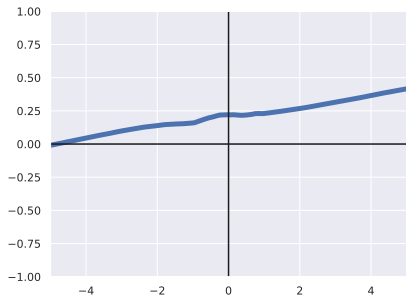

In [20]:
plot(x.detach().cpu().numpy(), y.detach().cpu().numpy(), ylim=(-1, 1), xlim=(-5, 5))

Using MSE Loss function

In [21]:
loss_fn = nn.MSELoss()
loss_fn(torch.tensor([1.4, 3.3, 1.9]), torch.tensor([1, 3, 2]))

tensor(0.0867)

In [23]:
net = Net(input_size=1, output_size=1)
net.to(device)
LOSS = []
for _ in range(1000):
    # print(x.device)
    net.train()
    y = net(x)
    # print(y.device)
    y_target = y_target.to(device)
    # print(y_target.device)
    loss = loss_fn(y, y_target)
    LOSS.append(loss.item())
    loss.backward()
    for p in net.parameters():

        p.data.add_(- 0.001 * p.grad)
        p.grad.data.zero_()

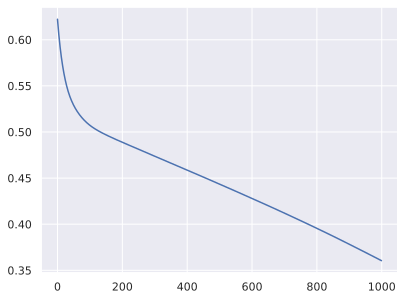

In [24]:
plt.plot(LOSS)
plt.show()

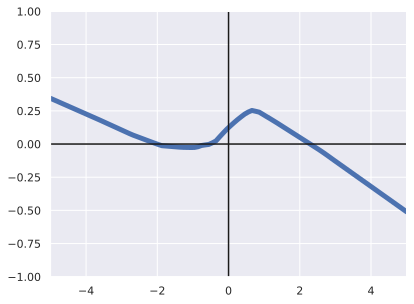

In [25]:
plot(x.detach().cpu().numpy(), y.detach().cpu().numpy(), ylim=(-1, 1), xlim=(-5, 5))

### Loss Functions
PyTorch has a bunch of built in loss functions, which are just other modules that you can pass your data through.

In [26]:
loss_fn = nn.MSELoss()
loss_fn(torch.tensor([1.4, 3.3, 1.9]), torch.tensor([1, 3, 2]))

tensor(0.0867)

In [27]:
net = Net(input_size=1, output_size=1)
net.to(device)
for _ in range(1000):
  y = net(x)
  loss = loss_fn(y, y_target)
  loss.backward()
  for p in net.parameters():
    p.data.add_(- 0.001 * p.grad)
    p.grad.data.zero_()

#### Optimizers

We can also use the `optim` package for built-in optimizers instead of implementing gradient descent ourselves.

In [28]:
from torch import optim

net = Net(input_size=1, output_size=1)

optimizer = optim.Adam(net.parameters(), lr=1e-3) # or SGD, RMSProp

x = torch.linspace(-5, 5, 100).view(-1, 1)
y = net(x)
y_target = torch.sin(x)
loss_fn = nn.MSELoss()

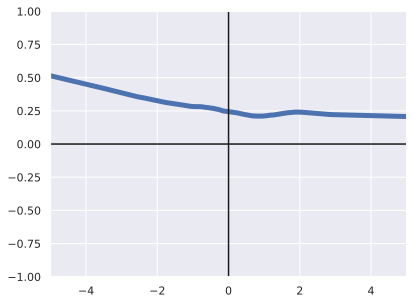

In [29]:
plot(x.detach().cpu().numpy(), y.detach().cpu().numpy(), ylim=(-1, 1), xlim=(-5, 5))

and here's how you can use the optimize to train the network.
Note that we call `zero_grad` _before_ calling `loss.backward()`, and then we just call `optimizer.step()`. This `step` function will take care of updating all the parameters that were passed to that optimizer's constructor.

In [30]:
for _ in range(100):
  y = net(x)
  loss = loss_fn(y, y_target)

  optimizer.zero_grad() # zero's out gradients
  loss.backward() # populate gradients
  optimizer.step() # update each parameter via gradient descent

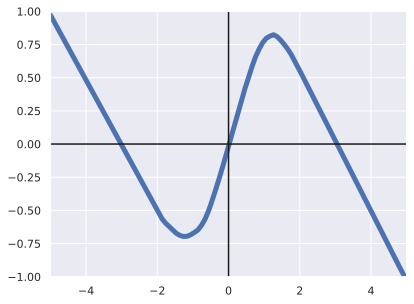

In [31]:
plot(x.detach().cpu().numpy(), y.detach().cpu().numpy(), ylim=(-1, 1), xlim=(-5, 5))

To summarize, here's what we did:

- Defined a class for our neural network (subclass of `nn.Module`)
- Specified a loss function (MSE loss) and optimizer (Adam) --> make sure to pass all model parameters (especially for multimodal)
- Performed training by doing the following in a loop:
    - Make prediction
    - Compute loss
    - Zero the stored gradients
    - Backprop the loss with `.backward()`
    - Update the weights by taking a step of gradient descent